<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ablation-Study-on-the-Deep-Model" data-toc-modified-id="Ablation-Study-on-the-Deep-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ablation Study on the Deep Model</a></span></li></ul></div>

# Ablation Study on the Deep Model

In [1]:
raw_path = r'/home/liucc/Workspace/Ellipse/03_results/01_industry/01_raw/'
trans_path = r'/home/liucc/Workspace/Ellipse/03_results/01_industry/02_transfer/'
trans_single_loss_path = r'/home/liucc/Workspace/Ellipse/03_results/01_industry/02_transfer_single_loss/'
trans_no_hourglass_path = r'/home/liucc/Workspace/Ellipse/03_results/01_industry/02_transfer_no_hourglass/'
trans_backmerge_path = r'/home/liucc/Workspace/Ellipse/03_results/01_industry/02_transfer_without_backmerge/'


In [2]:
import os 
fnames = os.listdir(raw_path)
fnames = [n[:-4] for n in fnames if n[-3:]=='jpg']
fnames.sort()
print(fnames[:10])

['001', '002', '003', '004', '005', '006', '007', '008', '009', '010']


In [3]:
import sys
sys.path.append('/home/liucc/Workspace/Ellipse/01_data')
from cc_process_image import *
import imageio

raws = get_all_images(f'{raw_path}',fnames,'jpg',gray=False)
trans = get_all_images(f'{trans_path}',fnames,'png')
trans_s = get_all_images(f'{trans_single_loss_path}',fnames,'png')
trans_n = get_all_images(f'{trans_no_hourglass_path}',fnames,'png')
trans_b = get_all_images(f'{trans_backmerge_path}',fnames,'png')

ims = [raws,trans_n,trans_b,trans_s,trans]

print(len(raws))

66


In [4]:
_ids = [65,21,48]

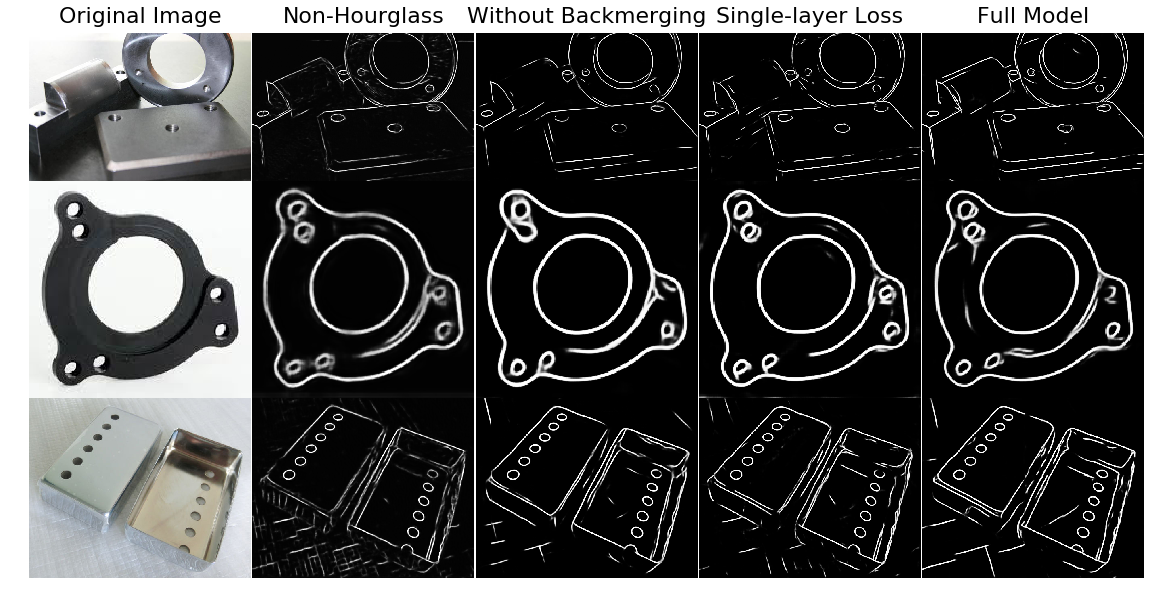

In [7]:
%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pylab import *

from matplotlib.font_manager import FontProperties
fp = FontProperties(family="DejaVu Sans",size=22)


titles = ['Original Image','Non-Hourglass','Without Backmerging','Single-layer Loss','Full Model']
hs = [raws[i].shape[0]/raws[i].shape[1] for i in _ids]


fig = plt.figure(figsize=(20,sum(hs)*20/len(titles)+0.2))
gs = gridspec.GridSpec(len(_ids),len(titles),
                       wspace=0.0,
                       hspace=0.0,
                       width_ratios=[1]*len(titles),
                       height_ratios=hs,
                       )

for i,_id in enumerate(_ids):
    
    for j in range(len(titles)):
        
        ax = fig.add_subplot(gs[i,j])
        im = ims[j][_id]
        
        ax.imshow(im,cmap="gray")
        
        if i==0:
            ax.set_title(titles[j],fontproperties=fp,pad=10)
            
        ax.axis('off')
    

plt.show()

pp = PdfPages('images/ablation.pdf')
pp.savefig(fig,dpi=300)
pp.close()